<a href="https://colab.research.google.com/github/abhinag007/Stock-Money-MLM/blob/master/Stock_Predict_trading_GOOGL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas_datareader.data as web
import numpy as np
from keras.layers.convolutional import Conv1D
from keras.models import Sequential
from keras.layers import MaxPooling1D
from keras.layers import Flatten
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import date
from datetime import time
plt.style.use('fivethirtyeight') 

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
# pip install alpha_vantage

In [ ]:
# api_key = '5LLGMLRK81AS4OEH'

In [ ]:
# import pandas as pd
# from alpha_vantage.timeseries import TimeSeries
# import time
# import matplotlib.pyplot as plt
# from alpha_vantage.foreignexchange import ForeignExchange

In [ ]:
# ts = TimeSeries(key=api_key,output_format='pandas')
# df, meta_data = ts.get_daily(symbol='IBM', outputsize='full')
# print(df)

In [ ]:
# cc = ForeignExchange(key = api_key, output_format = 'pandas')
# df, meta_data = cc.get_currency_exchange_intraday(from_symbol='GBP', to_symbol='JPY',interval='1min',outputsize='full')
# print(df)

In [ ]:
# df = df[::-1]
# df.tail(10)

In [ ]:
# Get the stock quote
df = web.DataReader('GOOGL', data_source='yahoo',start = '2000-01-25', end = date.today())

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,52.082081,48.028027,50.050049,50.220219,44659000.0,50.220219
2004-08-20,54.594593,50.300301,50.555557,54.209209,22834300.0,54.209209
2004-08-23,56.796795,54.579578,55.430431,54.754753,18256100.0,54.754753
2004-08-24,55.855854,51.836838,55.675674,52.487488,15247300.0,52.487488
2004-08-25,54.054054,51.991993,52.532532,53.053055,9188600.0,53.053055
...,...,...,...,...,...,...
2020-08-10,1507.150024,1477.489990,1490.800049,1496.819946,1027300.0,1496.819946
2020-08-11,1510.439941,1478.189941,1494.000000,1480.540039,1554900.0,1480.540039
2020-08-12,1511.670044,1485.000000,1487.119995,1507.239990,1126600.0,1507.239990


In [ ]:
#show the data
df['Date'] = df.index

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close,Date
Date,,,,,,,
2004-08-19,52.082081,48.028027,50.050049,50.220219,44659000.0,50.220219,2004-08-19
2004-08-20,54.594593,50.300301,50.555557,54.209209,22834300.0,54.209209,2004-08-20
2004-08-23,56.796795,54.579578,55.430431,54.754753,18256100.0,54.754753,2004-08-23
2004-08-24,55.855854,51.836838,55.675674,52.487488,15247300.0,52.487488,2004-08-24
2004-08-25,54.054054,51.991993,52.532532,53.053055,9188600.0,53.053055,2004-08-25
...,...,...,...,...,...,...,...
2020-08-10,1507.150024,1477.489990,1490.800049,1496.819946,1027300.0,1496.819946,2020-08-10
2020-08-11,1510.439941,1478.189941,1494.000000,1480.540039,1554900.0,1480.540039,2020-08-11
2020-08-12,1511.670044,1485.000000,1487.119995,1507.239990,1126600.0,1507.239990,2020-08-12


In [ ]:
#Get number of rows and colomns in datasets
df.shape

(4026, 7)

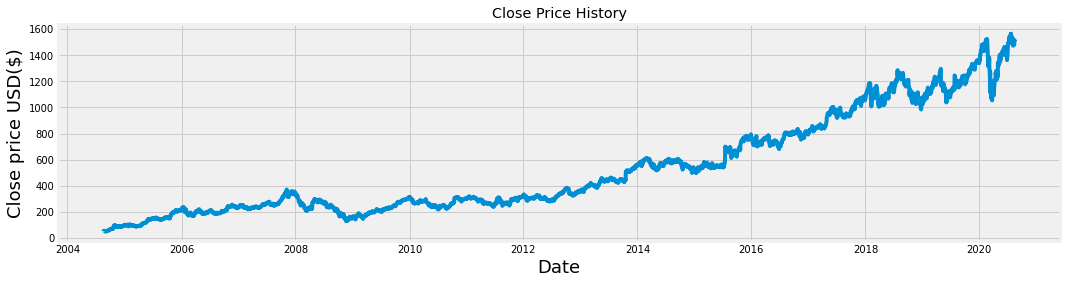

In [ ]:
# Close price history
plt.figure(figsize=(16,4))
plt.title('Close Price History')
plt.plot(df['Adj Close'],);
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD($)', fontsize = 18)
plt.show()

In [ ]:
# Create new dataframe with only close coloumn
data = df.filter(['Adj Close'])
# Convert dataframe to numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * 0.9)

training_data_len

3624

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.09034527e-04],
       [2.74238821e-03],
       [3.10253179e-03],
       ...,
       [9.61968459e-01],
       [9.68180543e-01],
       [9.60245463e-01]])

In [ ]:
# Create training datasets
# Create the scaled training datasets
train_data = scaled_data[0:training_data_len,:]
# Slit x_train and y_train datasets
x_train = []
y_train = []
for i in range(20,len(train_data)):
  x_train.append(train_data[i-20:i,0])
  y_train.append(train_data[i,0])
  if i<=20:
    print(x_train)
    print(y_train)
    print() 

[array([1.09034527e-04, 2.74238821e-03, 3.10253179e-03, 1.60578442e-03,
       1.97914652e-03, 2.61022568e-03, 2.02870652e-03, 6.60817680e-04,
       7.79764207e-04, 7.92985245e-05, 4.95612630e-04, 0.00000000e+00,
       5.18740632e-04, 7.56636205e-04, 7.59940206e-04, 1.75777095e-03,
       2.47475663e-03, 3.79308547e-03, 3.96159452e-03, 4.61249768e-03])]
[0.005775533475163588]



In [ ]:
# convert x_train y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(3604, 20, 1)

In [ ]:
# Build CNN Model
model = Sequential()
model.add(Conv1D(filters = 16, kernel_size=3, activation = 'relu',input_shape = (x_train.shape[1],1)))
model.add(MaxPooling1D(pool_size = 2))
model.add(Conv1D(filters = 32, kernel_size=3, activation = 'relu',input_shape = (x_train.shape[1],1)))
model.add(MaxPooling1D(pool_size = 4))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x_train,y_train,batch_size=16, epochs = 70)

Epoch 1/70
226/226 [==============================] - 1s 4ms/step - loss: 0.0091
Epoch 2/70
226/226 [==============================] - 1s 4ms/step - loss: 4.1535e-04
Epoch 3/70
226/226 [==============================] - 1s 4ms/step - loss: 3.6825e-04
Epoch 4/70
226/226 [==============================] - 1s 4ms/step - loss: 4.2940e-04
Epoch 5/70
226/226 [==============================] - 1s 4ms/step - loss: 3.5858e-04
Epoch 6/70
226/226 [==============================] - 1s 4ms/step - loss: 3.3855e-04
Epoch 7/70
226/226 [==============================] - 1s 4ms/step - loss: 3.5096e-04
Epoch 8/70
226/226 [==============================] - 1s 4ms/step - loss: 4.1542e-04
Epoch 9/70
226/226 [==============================] - 1s 4ms/step - loss: 3.3806e-04
Epoch 10/70
226/226 [==============================] - 1s 4ms/step - loss: 3.9065e-04
Epoch 11/70
226/226 [==============================] - 1s 4ms/step - loss: 3.5541e-04
Epoch 12/70
226/226 [==============================] - 1s 4ms/step 

In [ ]:
# Crete testing datasets
# Create a new array containing scaled value from index 1704 to 2130
test_data = scaled_data[training_data_len-20: ,:]
# Create dataset x_test, y_test 
x_test = []
y_test = dataset[training_data_len: ,:]
for i in range(20, len(test_data)):
  x_test.append(test_data[i-20:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
# x_test = range(10)

In [ ]:
# Get model prediction price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

49.63531706700871

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


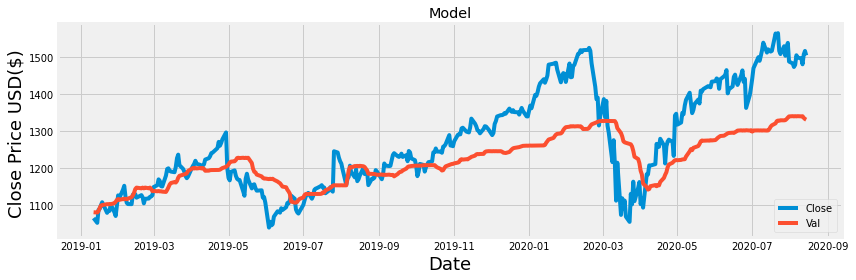

In [ ]:
# PLot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(12,4))
plt.title("Model")
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($) ', fontsize=18)
# plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Close','Val','Predictions'],loc = 'lower right')
plt.tight_layout()
plt.show()

In [ ]:
# valid.sum(axis=0)

In [ ]:
valid.tail(30)

,Adj Close,Predictions
Date,,
2020-07-06,1499.650024,1301.682861
2020-07-07,1489.920044,1301.426880
2020-07-08,1503.599976,1301.682861
2020-07-09,1518.660034,1301.301636
2020-07-10,1539.010010,1301.682861
2020-07-13,1512.229980,1301.260620
2020-07-14,1520.859985,1301.630859
2020-07-15,1516.880005,1305.856689
2020-07-16,1514.920044,1311.701904


In [ ]:
# # Get the quote
# # apple_quote = web.DataReader('TATAMOTORS.NS',data_source='yahoo',start='2012-01-01',end='2020-06-22')
# apple_quote, meta_data = cc.get_currency_exchange_intraday(from_symbol='GBP', to_symbol='JPY',interval='1min',outputsize='full')
# apple_quote = apple_quote[::-1]
# # Create new dataframe
# new_df = apple_quote.filter(items=['Open'])
# # Get the last 20 days closing price and convert to numpy array
# last_20_days = new_df[-20:].values
# # Scale the data to be values between 0 and 1
# last_20_days_scaled = scaler.transform(last_20_days)
# # Create an empty list
# X_test = []
# # Append the past 20 days
# X_test.append(last_20_days_scaled)

# # Convert the X_test dataset to numpy array
# X_test = np.array(X_test)
# # Reshape the data
# X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# # Get Predicted scaled price
# pred_price = model.predict(X_test)
# # undo the scaling
# pred_price = scaler.inverse_transform(pred_price)
# comp = (new_df['Open'][-1])
# # comp = float("{:.5f}".format(comp))
# # pred_price = float(pred_price)
# # pred_price = float("{:.4f}".format(pred_price))
# print(pred_price)
# print(comp)
# if pred_price > comp:
#   print("green")
# elif pred_price < comp:
#   print("red")
# else:
#   print ("Dont buy or sell")

In [ ]:
# new, meta_data = cc.get_currency_exchange_intraday(from_symbol='GBP', to_symbol='JPY',interval='1min',outputsize='full')
# new = new[::-1]
# print(new.tail(10))

In [ ]:
# pred_price = np.reshape(pred_price,1)
# lst_2 = np.reshape(lst_2,20)
# lst_2 = np.append(lst_2,pred_price)
# lst_2 = lst_2[1:]
# lst_2=np.reshape(lst_2,(1,20,1))
# pred_price = model.predict(lst_2)
# pred_price = scaler.inverse_transform(pred_price)
# print(pred_price)
# pred_price = scaler.transform(pred_price)